In this example, we will use the multicell module to simulate the self-organization of a geometrical Turing pattern, based on equations developed by Gierer and Meinhardt.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 20, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (1.14 s)


## Biological species

In [4]:
sim.register_cell_variable("a")
sim.register_cell_variable("h")

## Computed variables

In [5]:
def c_a2(c_a, **kwargs):
    return c_a**2

sim.register_computed_variable("c_a2", c_a2)

## Constants

In [6]:
sim.set_constants({"mu_a": 1e-1, "mu_h": 2e-1, "rho_a": 1., "rho_h": 1., "q": 1., "H": 0.35, "A": 0., "D_h": 5., "D_a": 0.025})

## Differential equations

In [7]:
def da_dt(simulation, a, c_a, c_a2, c_h, D_a, mu_a, rho_a, A, q, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + rho_a * c_a2 / c_h / (1 + q**2 * c_a2) - mu_a * a + A


def dh_dt(simulation, h, c_a2, c_h, D_h, mu_h, rho_h, H, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_h, c_h, adjacency_matrix) + rho_h * c_a2 - mu_h * h + H

sim.set_ODE("a", da_dt)
sim.set_ODE("h", dh_dt)

In [8]:
sim.initialize_cell_variables()

a0 = np.random.uniform(0.28, 0.31, sim.n_cells)
h0 = np.random.uniform(4.37, 4.43, sim.n_cells)

sim.set_cell_variable("a", a0)
sim.set_cell_variable("h", h0)

## Duration

In [9]:
sim.set_duration(1e7)

## Tissue growth

In [10]:
sim.enable_growth(n_steps=11)
sim.register_growth_method(multicell.growth.linear_growth, {"coefficient": [1.1, 1.05, 1.]})

## Cell divisions

In [11]:
sim.enable_division(contraction=0)
sim.register_division_method(multicell.division.symmetrical_division)
sim.register_division_trigger(multicell.division.volume_trigger, {"volume_threshold": 2.})

## Dilution volumes

In [12]:
sim.register_dilution_volume_function(multicell.dilution.constant_volume, {"value": 1.})

## Rendering

In [13]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "a")


# Visualization of the initial state

<IPython.core.display.Javascript object>


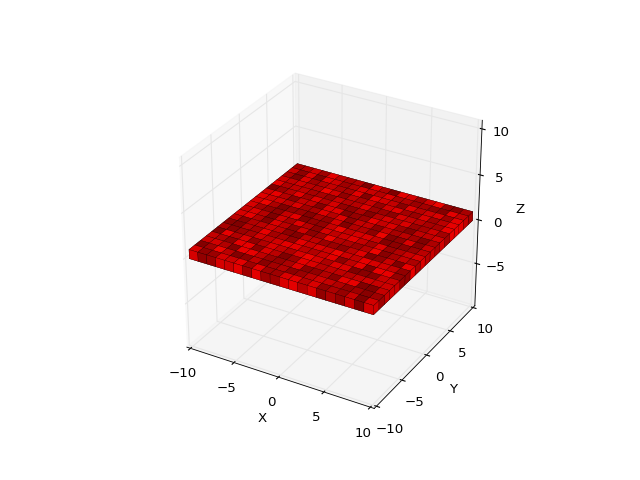

a: from 0.279988442338 to 0.309885831475
h: from 4.36899672678 to 4.43031210804


In [14]:
sim.renderer.display("a")

# Simulation

Jacobian computation: started
Jacobian computation: finished (0.04 s)
Growth step #0
Integration of the ODE system: 11.8514750004 seconds
Growth of the tissue: 0.000945091247559 seconds
Cell divisions: 0.535905838013 seconds


<IPython.core.display.Javascript object>


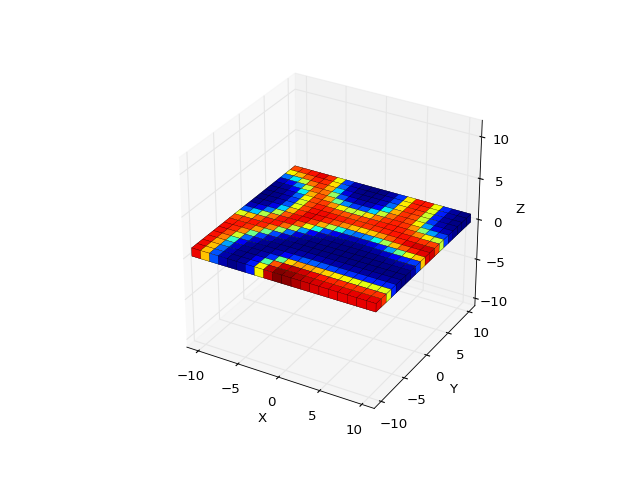

a: from 0.00183821280181 to 1.27900953512
h: from 3.77862535713 to 4.90866469576
Jacobian computation: started
Jacobian computation: finished (0.04 s)
Growth step #1
Integration of the ODE system: 5.23764204979 seconds
Growth of the tissue: 0.000929117202759 seconds
Cell divisions: 0.675143003464 seconds


<IPython.core.display.Javascript object>


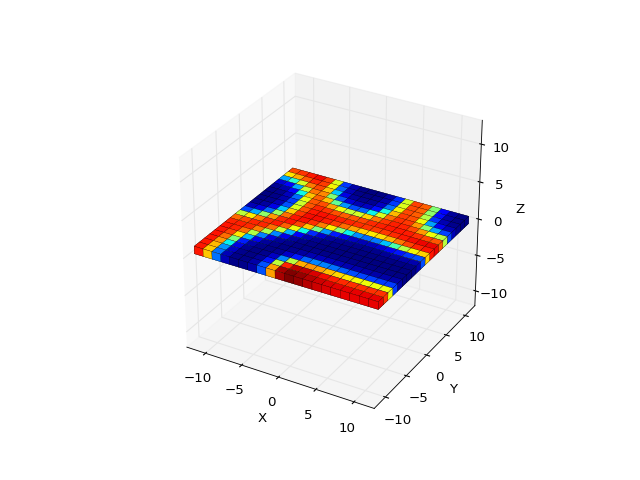

a: from 0.00246996867666 to 1.29292921697
h: from 3.7910757541 to 4.90929306209
Jacobian computation: started
Jacobian computation: finished (0.04 s)
Growth step #2
Integration of the ODE system: 4.76321601868 seconds
Growth of the tissue: 0.0013599395752 seconds
Cell divisions: 0.879184007645 seconds


<IPython.core.display.Javascript object>


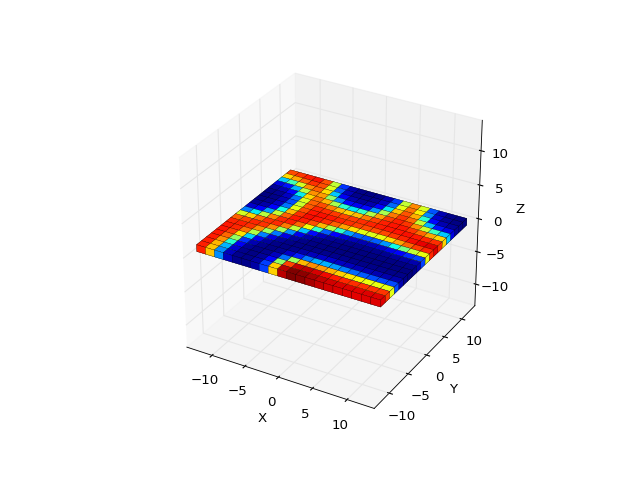

a: from 0.00318233678826 to 1.29687060623
h: from 3.82612810302 to 4.90262974819
Jacobian computation: started
Jacobian computation: finished (0.05 s)
Growth step #3
Integration of the ODE system: 11.5935900211 seconds
Growth of the tissue: 0.00182294845581 seconds
Cell divisions: 0.775511980057 seconds


<IPython.core.display.Javascript object>


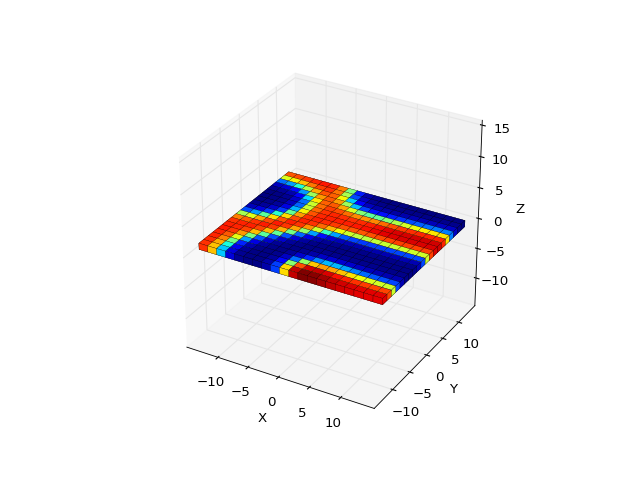

a: from 0.00251396913421 to 1.30244114575
h: from 3.82795942328 to 4.91155088508
Jacobian computation: started
Jacobian computation: finished (0.06 s)
Growth step #4
Integration of the ODE system: 4.87745404243 seconds
Growth of the tissue: 0.00163197517395 seconds
Cell divisions: 2.5210518837 seconds


<IPython.core.display.Javascript object>


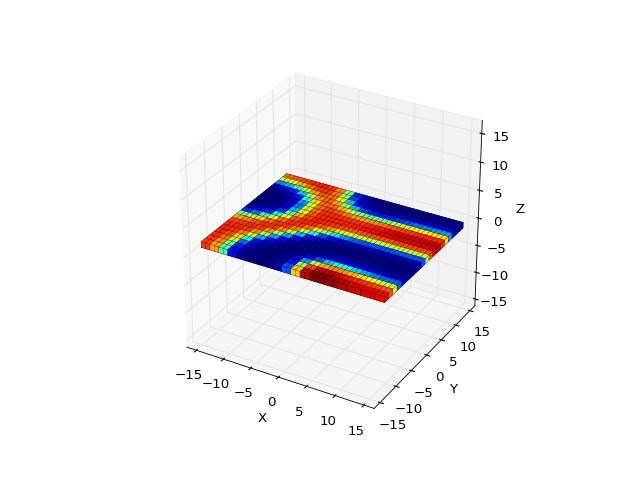

a: from 0.00159522358282 to 0.65347555895
h: from 1.92103325137 to 2.45559647943
Jacobian computation: started
Jacobian computation: finished (0.14 s)
Growth step #5
Integration of the ODE system: 33.3803510666 seconds
Growth of the tissue: 0.00811815261841 seconds
Cell divisions: 2.04585814476 seconds


<IPython.core.display.Javascript object>


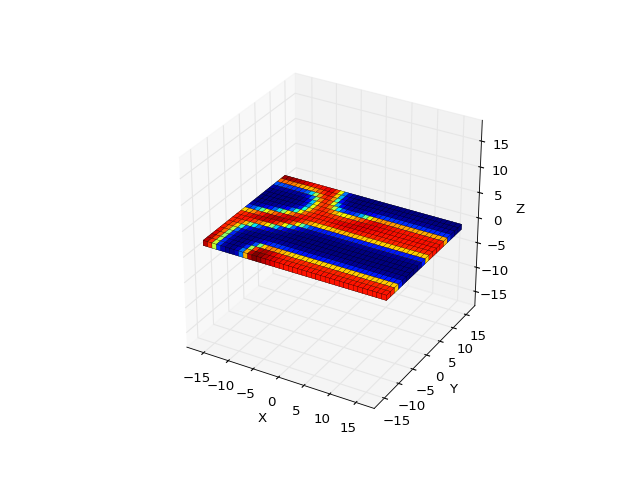

a: from 0.000233625304714 to 1.26306545147
h: from 3.51164937224 to 4.95819132591
Jacobian computation: started
Jacobian computation: finished (0.12 s)
Growth step #6
Integration of the ODE system: 19.8717548847 seconds
Growth of the tissue: 0.00354504585266 seconds
Cell divisions: 1.8842921257 seconds


<IPython.core.display.Javascript object>


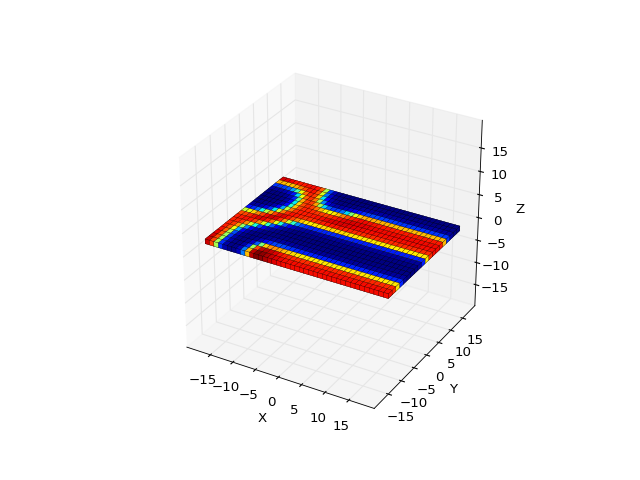

a: from 0.000341662504449 to 1.27403383107
h: from 3.57057392285 to 4.95600229642
Jacobian computation: started
Jacobian computation: finished (0.13 s)
Growth step #7
Integration of the ODE system: 11.2876968384 seconds
Growth of the tissue: 0.0213429927826 seconds
Cell divisions: 2.12893795967 seconds


<IPython.core.display.Javascript object>


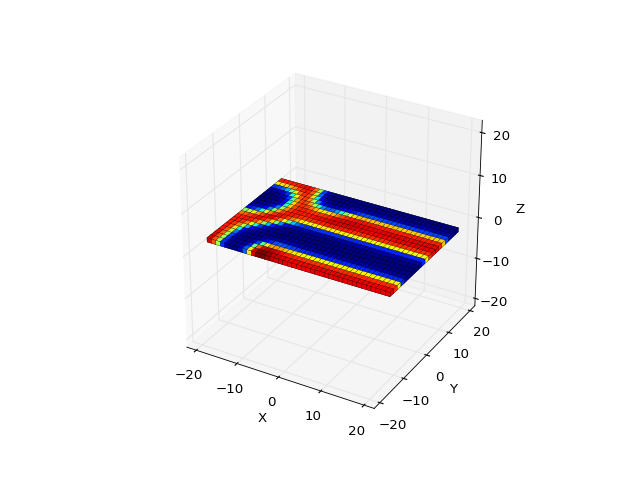

a: from 0.00051489309372 to 1.27912202016
h: from 3.63072156708 to 4.94188045443
Jacobian computation: started
Jacobian computation: finished (0.12 s)
Growth step #8
Integration of the ODE system: 9.58805298805 seconds
Growth of the tissue: 0.0126171112061 seconds
Cell divisions: 2.83046388626 seconds


<IPython.core.display.Javascript object>


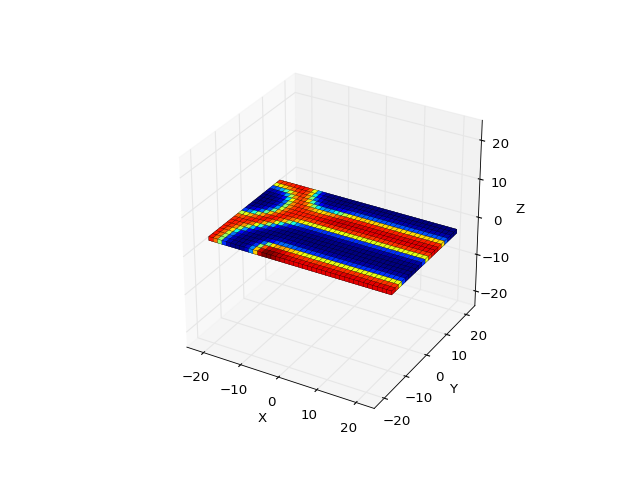

a: from 0.000787821784645 to 1.29074310391
h: from 3.69273742377 to 4.93290763988
Jacobian computation: started
Jacobian computation: finished (0.14 s)
Growth step #9
Integration of the ODE system: 8.62306880951 seconds
Growth of the tissue: 0.00310182571411 seconds
Cell divisions: 6.25162196159 seconds


<IPython.core.display.Javascript object>


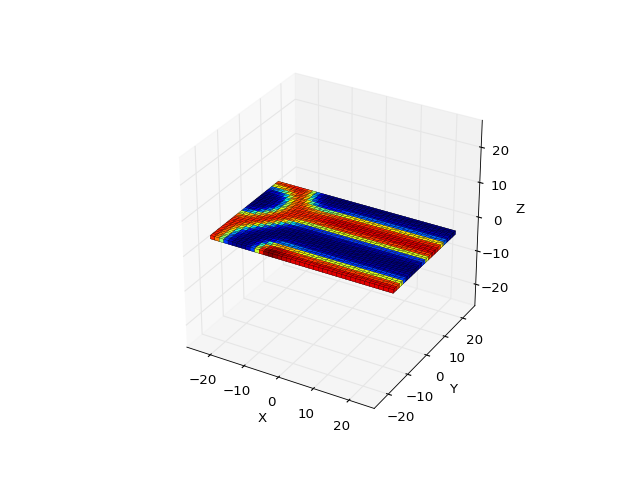

a: from 0.000841416210236 to 0.649509300093
h: from 1.88181273026 to 2.46254405567
Jacobian computation: started
Jacobian computation: finished (0.40 s)
Growth step #10
Integration of the ODE system: 92.9713299274 seconds
Growth of the tissue: 0.0324420928955 seconds
Cell divisions: 5.47158408165 seconds


<IPython.core.display.Javascript object>


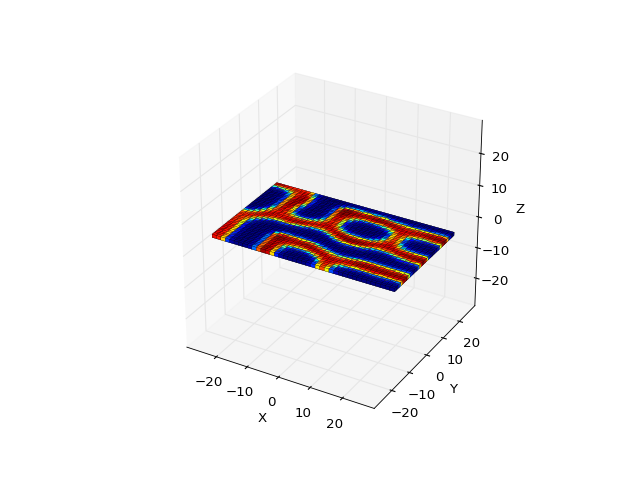

a: from 0.000146519635595 to 1.24392586117
h: from 3.52450151396 to 4.97679034797


In [15]:
sim.simulate()

We can see that as the tissue grows and the cells divide, new ridges of activator engulf into the valleys widened by growth.

Cell divisions do not directly trigger the reorganization of the pattern, because the spatial distribution of chemical species does not actually change (new cells have the same concentrations as former cells and occupy the same space). However, cell divisions modify how far the inhibitor can reach, relatively to the pattern previously achieved. Where it cannot reach, the activator starts being expressed. 